## ts.inside

### ts.inside(min_v, max_v, nan_v, inside_v, outside_v)

```python
TimeSeries.inside(min_v:float, 
                  max_v:float,
                  nan_v:float=float('nan'),
                  inside_v:float=1.0, 
                  outside_v:float=0.0)->TimeSeries:
```

This function is useful when you have to map a time-series value range into a time-series of ones and zero's.

Typically, you can use it to create a mask timeseries for where the point values is within a  certain limit.

E.g. when temperature is in range |10..15)degC.
```python
range_10_15 = temperature.inside(min_v=10.0,max_v=15.0)
```
then you can use the .integral function to compute the time it's within this range on a daily basis like this:
```python
daily_duration_in_range_10_15 = range_10_15.integral(time_axis_daily)
```
       
You can tune the function to your needs by passing the other optional parameters.

Notice that you can set min_v=float('nan') to have range -oo .. max_v, and similar for max_v.



In [1]:
%pylab inline
import os
import datetime as dt
from os import path
import sys
from matplotlib import pyplot as plt
# try to auto-configure the path, -will work in all cases where doc and data
# are checked out at same level

# use this, if you want to set up shyft data path manually in the code
# shyft_data_path = path.abspath("../../../../shyft-data")
# if path.exists(shyft_data_path) and 'SHYFT_DATA' not in os.environ:
#     os.environ['SHYFT_DATA']=shyft_data_path

#preffered way
from shyft.hydrology import shyftdata_dir # the dir is set via environment varible SHYFT_DATA


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
from shyft.time_series import TimeSeries,Calendar,TimeAxis,POINT_AVERAGE_VALUE,DoubleVector,deltahours

In [3]:
# Create a test time-series,
utc = Calendar()
t0 = utc.time(2018, 5, 1)
delta = deltahours(1)
n = utc.diff_units(t0, utc.time(2018, 6, 1), delta)
ta = TimeAxis(t0, delta, n)
ta_day= TimeAxis(t0,delta*24,n//24)

# just generate some data that is alive
x = np.linspace(start=0.0,stop=np.pi*2*n/24,num=len(ta))

# increasing values
pattern_values = DoubleVector.from_numpy(10.0+5*np.sin(x/30) + 10*np.sin(x)+x/(10*n/24)+ 0.1*np.random.normal(0,0.1,len(ta))) 

temperature = TimeSeries(ta=ta, 
                        values=pattern_values, 
                        point_fx=POINT_AVERAGE_VALUE)

temp_range_15_20 = temperature.inside(min_v=15.0,max_v=20.0)
temp_below_zero  = temperature.inside(min_v=float('nan'),max_v=0.0)  #note the use of nan here
temp_above_15_hours_pr_day = temperature.inside(min_v=15.0,max_v=float('nan')).integral(ta_day)/3600.0 # sec->hours

Text(0, 0.5, 'temperature [degC]')

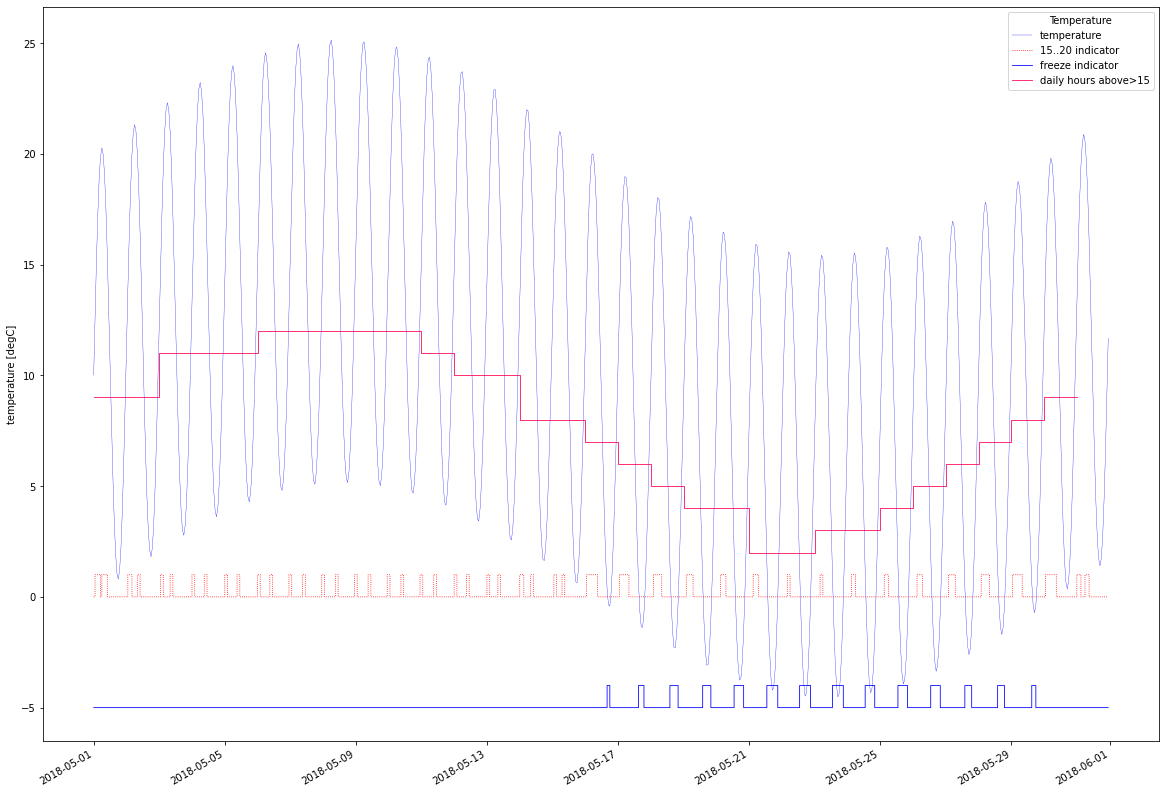

In [5]:
# lets show how this looks!
ts_timestamps = [dt.datetime.utcfromtimestamp(p) for p in ta.time_points][:-1]
day_timestamps= [dt.datetime.utcfromtimestamp(p) for p in ta_day.time_points][:-1] 

fig, ax = plt.subplots(figsize=(20,15))
ax.plot(ts_timestamps, temperature.values, label = "temperature",linewidth=0.3, color='b')

ax.step(ts_timestamps, temp_range_15_20.values, label = "15..20 indicator",color='r',linewidth=0.8,linestyle='dotted')
ax.step(ts_timestamps, (temp_below_zero-5.0).values, label = "freeze indicator",color=(0.0, 0.0, 1.0),linewidth=0.8,linestyle='solid')
ax.step(day_timestamps, temp_above_15_hours_pr_day.values,label="daily hours above>15",color=(1.0,0.0,0.3),linewidth=0.8, linestyle='solid')

fig.autofmt_xdate()
ax.legend(title="Temperature")
ax.set_ylabel("temperature [degC]")